In [868]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [869]:
df=pd.read_csv("IMDB_Movies_Dataset (2).csv")

In [870]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4989 non-null   int64  
 1   Title              4989 non-null   object 
 2   Average Rating     4989 non-null   float64
 3   Director           4989 non-null   object 
 4   Writer             4988 non-null   object 
 5   Metascore          3055 non-null   float64
 6   Cast               4982 non-null   object 
 7   Release Date       4989 non-null   object 
 8   Country of Origin  4986 non-null   object 
 9   Languages          4968 non-null   object 
 10  Budget             2651 non-null   object 
 11  Worldwide Gross    3895 non-null   object 
 12  Runtime            4989 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 506.8+ KB


In [871]:
df.isnull().sum()

Unnamed: 0              0
Title                   0
Average Rating          0
Director                0
Writer                  1
Metascore            1934
Cast                    7
Release Date            0
Country of Origin       3
Languages              21
Budget               2338
Worldwide Gross      1094
Runtime                 0
dtype: int64

In [872]:
df.drop("Unnamed: 0", axis=1,inplace=True)
df.drop("Title", axis=1,inplace=True)

In [873]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4989 non-null   float64
 1   Director           4989 non-null   object 
 2   Writer             4988 non-null   object 
 3   Metascore          3055 non-null   float64
 4   Cast               4982 non-null   object 
 5   Release Date       4989 non-null   object 
 6   Country of Origin  4986 non-null   object 
 7   Languages          4968 non-null   object 
 8   Budget             2651 non-null   object 
 9   Worldwide Gross    3895 non-null   object 
 10  Runtime            4989 non-null   object 
dtypes: float64(2), object(9)
memory usage: 428.9+ KB


In [874]:
missing_columns = df.columns[df.isnull().sum() > 0]

for col in missing_columns:
    if df[col].dtype == 'object': 
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:  
        df[col].fillna(df[col].mean(), inplace=True)

/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_42919/2289190825.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_42919/2289190825.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [875]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4989 non-null   float64
 1   Director           4989 non-null   object 
 2   Writer             4989 non-null   object 
 3   Metascore          4989 non-null   float64
 4   Cast               4989 non-null   object 
 5   Release Date       4989 non-null   object 
 6   Country of Origin  4989 non-null   object 
 7   Languages          4989 non-null   object 
 8   Budget             4989 non-null   object 
 9   Worldwide Gross    4989 non-null   object 
 10  Runtime            4989 non-null   object 
dtypes: float64(2), object(9)
memory usage: 428.9+ KB


In [876]:
categorical_columns=df.select_dtypes(include=["object","category"]).columns 

In [877]:
categorical_columns

Index(['Director', 'Writer', 'Cast', 'Release Date', 'Country of Origin',
       'Languages', 'Budget', 'Worldwide Gross', 'Runtime'],
      dtype='object')

In [878]:
columns_to_clean=['Budget', 'Worldwide Gross','Runtime']
def clean_numeric_column(column):
    if column.dtype!='object':
        column=column.astype(str)
    return(
        column.str.replace(r'[^\d.]','',regex=True).astype(float)

    )

for col in columns_to_clean:
    if col in df.columns:
        df[col]=clean_numeric_column(df[col])
print(df.dtypes)

Average Rating       float64
Director              object
Writer                object
Metascore            float64
Cast                  object
Release Date          object
Country of Origin     object
Languages             object
Budget               float64
Worldwide Gross      float64
Runtime              float64
dtype: object


In [879]:
df["Release Date"]=df["Release Date"].str.replace(r"\s\(.+?\)"," ",regex=True)

In [880]:
df["Release Date"]=pd.to_datetime(df["Release Date"],errors="coerce")

In [881]:
df["Release Date"]

0      1994-10-14
1      2024-11-08
2             NaT
3      1975-04-01
4      2001-09-25
          ...    
4984   2000-09-29
4985   1945-03-16
4986   2009-04-11
4987   2013-04-24
4988   2001-03-31
Name: Release Date, Length: 4989, dtype: datetime64[ns]

In [882]:
df["Year"]=df["Release Date"].dt.year
df["Month"]=df["Release Date"].dt.year
df["Day"]=df["Release Date"].dt.year

In [883]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Average Rating     4989 non-null   float64       
 1   Director           4989 non-null   object        
 2   Writer             4989 non-null   object        
 3   Metascore          4989 non-null   float64       
 4   Cast               4989 non-null   object        
 5   Release Date       4862 non-null   datetime64[ns]
 6   Country of Origin  4989 non-null   object        
 7   Languages          4989 non-null   object        
 8   Budget             4989 non-null   float64       
 9   Worldwide Gross    4989 non-null   float64       
 10  Runtime            4989 non-null   float64       
 11  Year               4862 non-null   float64       
 12  Month              4862 non-null   float64       
 13  Day                4862 non-null   float64       
dtypes: datet

In [884]:
df.drop("Release Date",axis=1,inplace=True)

In [885]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4989 non-null   float64
 1   Director           4989 non-null   object 
 2   Writer             4989 non-null   object 
 3   Metascore          4989 non-null   float64
 4   Cast               4989 non-null   object 
 5   Country of Origin  4989 non-null   object 
 6   Languages          4989 non-null   object 
 7   Budget             4989 non-null   float64
 8   Worldwide Gross    4989 non-null   float64
 9   Runtime            4989 non-null   float64
 10  Year               4862 non-null   float64
 11  Month              4862 non-null   float64
 12  Day                4862 non-null   float64
dtypes: float64(8), object(5)
memory usage: 506.8+ KB


In [886]:
df["Year"].fillna(df["Year"].mode()[0],inplace=True)

df["Month"].fillna(df["Month"].mode()[0],inplace=True)
df["Day"].fillna(df["Day"].mode()[0],inplace=True)

/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_42919/1033340658.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Year"].fillna(df["Year"].mode()[0],inplace=True)
/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_42919/1033340658.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [887]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4989 non-null   float64
 1   Director           4989 non-null   object 
 2   Writer             4989 non-null   object 
 3   Metascore          4989 non-null   float64
 4   Cast               4989 non-null   object 
 5   Country of Origin  4989 non-null   object 
 6   Languages          4989 non-null   object 
 7   Budget             4989 non-null   float64
 8   Worldwide Gross    4989 non-null   float64
 9   Runtime            4989 non-null   float64
 10  Year               4989 non-null   float64
 11  Month              4989 non-null   float64
 12  Day                4989 non-null   float64
dtypes: float64(8), object(5)
memory usage: 506.8+ KB


In [888]:
for col in ["Director","Writer","Cast"]:
    df[col + "_freq"]=df[col].map(df[col].value_counts())


In [889]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4989 non-null   float64
 1   Director           4989 non-null   object 
 2   Writer             4989 non-null   object 
 3   Metascore          4989 non-null   float64
 4   Cast               4989 non-null   object 
 5   Country of Origin  4989 non-null   object 
 6   Languages          4989 non-null   object 
 7   Budget             4989 non-null   float64
 8   Worldwide Gross    4989 non-null   float64
 9   Runtime            4989 non-null   float64
 10  Year               4989 non-null   float64
 11  Month              4989 non-null   float64
 12  Day                4989 non-null   float64
 13  Director_freq      4989 non-null   int64  
 14  Writer_freq        4989 non-null   int64  
 15  Cast_freq          4989 non-null   int64  
dtypes: float64(8), int64(3),

In [890]:
df["Director_freq"].value_counts

<bound method IndexOpsMixin.value_counts of 0        2
1        1
2        7
3       13
4        1
        ..
4984     2
4985     2
4986     3
4987     1
4988     1
Name: Director_freq, Length: 4989, dtype: int64>

In [891]:
df.drop(["Director","Writer","Cast"], axis=1,inplace=True)

In [892]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4989 non-null   float64
 1   Metascore          4989 non-null   float64
 2   Country of Origin  4989 non-null   object 
 3   Languages          4989 non-null   object 
 4   Budget             4989 non-null   float64
 5   Worldwide Gross    4989 non-null   float64
 6   Runtime            4989 non-null   float64
 7   Year               4989 non-null   float64
 8   Month              4989 non-null   float64
 9   Day                4989 non-null   float64
 10  Director_freq      4989 non-null   int64  
 11  Writer_freq        4989 non-null   int64  
 12  Cast_freq          4989 non-null   int64  
dtypes: float64(8), int64(3), object(2)
memory usage: 506.8+ KB


In [893]:
print("Unique values in 'Country of Origin':",df["Country of Origin"].nunique())
print("Unique values in 'Languages':",df["Languages"].nunique())

Unique values in 'Country of Origin': 812
Unique values in 'Languages': 1084


In [894]:
# Target Encoding for Country of Origin
country_mean = df.groupby('Country of Origin')['Worldwide Gross'].mean()
df['Country_Encoded'] = df['Country of Origin'].map(country_mean)

# Target Encoding for Languages
language_mean = df.groupby('Languages')['Worldwide Gross'].mean()
df['Language_Encoded'] = df['Languages'].map(language_mean)

# View results
print(df[['Country of Origin', 'Languages', 'Country_Encoded', 'Language_Encoded']])

     Country of Origin                    Languages  Country_Encoded  \
0        United States                      English     7.071662e+07   
1                Japan                     Japanese     2.026265e+07   
2        United States      English, Italian, Latin     7.071662e+07   
3               Turkey                      Turkish     3.704489e+06   
4         India, Japan                      English     5.090000e+02   
...                ...                          ...              ...   
4984             Spain                      Spanish     1.354326e+07   
4985     United States                      English     7.071662e+07   
4986             Japan                     Japanese     2.026265e+07   
4987            France  French, Portuguese, English     5.986502e+06   
4988       South Korea                       Korean     3.337807e+07   

      Language_Encoded  
0         6.671104e+07  
1         2.786597e+07  
2         1.654935e+08  
3         3.019020e+06  
4         

In [895]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Average Rating     4989 non-null   float64
 1   Metascore          4989 non-null   float64
 2   Country of Origin  4989 non-null   object 
 3   Languages          4989 non-null   object 
 4   Budget             4989 non-null   float64
 5   Worldwide Gross    4989 non-null   float64
 6   Runtime            4989 non-null   float64
 7   Year               4989 non-null   float64
 8   Month              4989 non-null   float64
 9   Day                4989 non-null   float64
 10  Director_freq      4989 non-null   int64  
 11  Writer_freq        4989 non-null   int64  
 12  Cast_freq          4989 non-null   int64  
 13  Country_Encoded    4989 non-null   float64
 14  Language_Encoded   4989 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 584.8+ KB


In [896]:
df.drop(['Country of Origin','Languages'], axis=1, inplace=True)

In [897]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Rating    4989 non-null   float64
 1   Metascore         4989 non-null   float64
 2   Budget            4989 non-null   float64
 3   Worldwide Gross   4989 non-null   float64
 4   Runtime           4989 non-null   float64
 5   Year              4989 non-null   float64
 6   Month             4989 non-null   float64
 7   Day               4989 non-null   float64
 8   Director_freq     4989 non-null   int64  
 9   Writer_freq       4989 non-null   int64  
 10  Cast_freq         4989 non-null   int64  
 11  Country_Encoded   4989 non-null   float64
 12  Language_Encoded  4989 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 506.8 KB


In [898]:
X = df.drop(columns=['Worldwide Gross'])  
y = df['Worldwide Gross'] 

In [899]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Average Rating    4989 non-null   float64
 1   Metascore         4989 non-null   float64
 2   Budget            4989 non-null   float64
 3   Worldwide Gross   4989 non-null   float64
 4   Runtime           4989 non-null   float64
 5   Year              4989 non-null   float64
 6   Month             4989 non-null   float64
 7   Day               4989 non-null   float64
 8   Director_freq     4989 non-null   int64  
 9   Writer_freq       4989 non-null   int64  
 10  Cast_freq         4989 non-null   int64  
 11  Country_Encoded   4989 non-null   float64
 12  Language_Encoded  4989 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 506.8 KB


In [900]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [901]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [902]:
y_pred_lr=lr.predict(X_test)

In [903]:
mse_lr=mean_squared_error(y_test,y_pred_lr)
r2_lr=r2_score(y_test,y_pred_lr)

In [904]:
print(mse_lr)
print(r2_lr)

1.4002087664006476e+16
0.3728899340957652


In [905]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [906]:
y_pred_dt=dt.predict(X_test)

In [907]:
mse_dt=mean_squared_error(y_test,y_pred_dt)
r2_dt=r2_score(y_test,y_pred_dt)

In [908]:
print(mse_dt)
print(r2_dt)

1.0540938914618394e+16
0.5279040485918931


In [909]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [910]:
y_pred_rf=rf.predict(X_test)

In [911]:
mse_rf=mean_squared_error(y_test,y_pred_rf)
r2_rf=r2_score(y_test,y_pred_rf)

In [912]:
print(mse_rf)
print(r2_rf)

6516201261634713.0
0.7081595615821369


In [913]:
# K-Nearest Neighbors Regressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

# Predictions and evaluation for KNN
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("KNN MSE:", mse_knn)
print("KNN R2:", r2_knn)

KNN MSE: 6108388592102639.0
KNN R2: 0.7264242258381857


In [914]:
df.head(1)

,Average Rating,Metascore,Budget,Worldwide Gross,Runtime,Year,Month,Day,Director_freq,Writer_freq,Cast_freq,Country_Encoded,Language_Encoded
0,9.3,82.0,25000000.0,29332133.0,222.0,1994.0,1994.0,1994.0,2,2,1,7.071662e+07,6.671104e+07


In [915]:
df['Revenue_Per_Runtime'] = df['Worldwide Gross'] / df['Runtime']
df['Revenue_Per_Budget'] = df['Worldwide Gross'] / df['Budget']
df['Revenue_Per_Budget'] = df['Average Rating'] / df['Budget']
df['Revenue_Per_Rating'] = df['Average Rating'] / df['Worldwide Gross']
df['Movie_Age'] = 2024 - df['Year'] 


In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average Rating       4989 non-null   float64
 1   Metascore            4989 non-null   float64
 2   Budget               4989 non-null   float64
 3   Worldwide Gross      4989 non-null   float64
 4   Runtime              4989 non-null   float64
 5   Year                 4989 non-null   float64
 6   Month                4989 non-null   float64
 7   Day                  4989 non-null   float64
 8   Director_freq        4989 non-null   int64  
 9   Writer_freq          4989 non-null   int64  
 10  Cast_freq            4989 non-null   int64  
 11  Country_Encoded      4989 non-null   float64
 12  Language_Encoded     4989 non-null   float64
 13  Revenue_Per_Runtime  4989 non-null   float64
 14  Revenue_Per_Budget   4989 non-null   float64
 15  Revenue_Per_Rating   4989 non-null   f

In [917]:
X = df.drop(columns=['Worldwide Gross'])  
y = df['Worldwide Gross'] 
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)


X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [918]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 1.4053315650509366e+16
Linear Regression R2: 0.37059559151179833


In [919]:
#1.4002087664006476e+16
#0.3728899340957652
#+

In [920]:
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("DT:", mse_dt)
print("DT:", r2_dt)

DT: 3018788373945986.5
DT: 0.8647978343256193


In [921]:
#1.0540938914618394e+16
#0.5279040485918931

In [922]:
rf=RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("RF MSE:", mse_rf)
print("RF R2:", r2_rf)

RF MSE: 1293643536049496.5
RF R2: 0.9420617194653059


In [923]:
#6516201261634713.0
#0.7081595615821369

In [924]:
knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("knn MSE:", mse_knn)
print("knn R2:", r2_knn)

knn MSE: 5111685628472063.0
knn R2: 0.7710634593730563


In [925]:
#KNN MSE: 6108388592102639.0
# KNN R2: 0.7264242258381857

In [926]:
#scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score




In [927]:
# Ma'lumotlarni bo'lish
X = df.drop(columns=["Worldwide Gross"])  # Mustaqil o'zgaruvchilar
y = df["Worldwide Gross"]  # Maqsadli o'zgaruvchi

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [928]:
#scaling
scaler_x=StandardScaler()
scaler_y=StandardScaler()

x_train_scaled=scaler_x.fit_transform(x_train)
x_test_scaled=scaler_x.fit_transform(x_test)

y_train_scaled=scaler_y.fit_transform(y_train.values.reshape(-1,1))
y_test_scaler=scaler_y.fit_transform(y_test.values.reshape(-1,1))


In [929]:
model = LinearRegression()
model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [930]:

y_pred_scaled = model.predict(x_test_scaled)


In [931]:
mse = mean_squared_error(y_test_scaler, y_pred_scaled)  #mse = mean_squared_error(y_test_scaler, y_pred_scaled)  
r2 = r2_score(y_test_scaler, y_pred_scaled)             #r2 = r2_score(y_test_scaler, y_pred_scaled)

In [932]:
print(mse)
print(r2)

0.466616672249738
0.533383327750262


In [933]:
model=DecisionTreeRegressor(random_state=42)
model.fit(x_train_scaled,y_train_scaled)

DecisionTreeRegressor(random_state=42)

In [934]:
y_pred_scaled = model.predict(x_test_scaled)

In [935]:
mse = mean_squared_error(y_test_scaler, y_pred_scaled) 
r2 = r2_score(y_test_scaler, y_pred_scaled)

In [936]:
print(mse)
print(r2)

1.0932429870568732
-0.09324298705687317


In [937]:
model=RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train_scaled,y_train_scaled)

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [938]:
mse = mean_squared_error(y_test_scaler, y_pred_scaled) 
r2 = r2_score(y_test_scaler, y_pred_scaled)

In [939]:
print(mse)
print(r2)

1.0932429870568732
-0.09324298705687317


In [940]:
knn = KNeighborsRegressor(n_neighbors=5) 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [941]:
mse = mean_squared_error(y_test_scaler, y_pred_scaled) 
r2 = r2_score(y_test_scaler, y_pred_scaled)

In [942]:
y_pred = knn.predict(X_test)

In [943]:
print(mse)
print(r2)

1.0932429870568732
-0.09324298705687317


In [858]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Ma'lumotlarni yaratish
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Model tanlash
model = LinearRegression()

# K-Fold yaratish (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation bahosi
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Natijalarni chiqarish
print("Har bir foldning MSE qiymatlari:", -scores)
print("O'rtacha MSE:", -np.mean(scores))
print("MSE standart chetlanishi:", np.std(scores))



Har bir foldning MSE qiymatlari: [104.20222653  66.52074552  63.17447946  69.47370565 105.17473228]
O'rtacha MSE: 81.70917788826905
MSE standart chetlanishi: 18.870610932980682


In [860]:
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Ma'lumotlarni yaratish
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Model tanlash
model = DecisionTreeRegressor()

# K-Fold yaratish (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation bahosi
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Natijalarni chiqarish
print("Har bir foldning MSE qiymatlari:", -scores)
print("O'rtacha MSE:", -np.mean(scores))
print("MSE standart chetlanishi:", np.std(scores))

Har bir foldning MSE qiymatlari: [226.22879169  94.43033405 248.89578985  61.507844   177.72695524]
O'rtacha MSE: 161.7579429650769
MSE standart chetlanishi: 72.92131830036523


In [862]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Ma'lumotlarni yaratish
x, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Model tanlash
model = RandomForestRegressor()

# K-Fold yaratish (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation bahosi
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Natijalarni chiqarish
print("Har bir foldning MSE qiymatlari:", -scores)
print("O'rtacha MSE:", -np.mean(scores))
print("MSE standart chetlanishi:", np.std(scores))

Har bir foldning MSE qiymatlari: [152.19594652  67.73452145 184.07955107  65.89136806 146.19030073]
O'rtacha MSE: 123.21833756569724
MSE standart chetlanishi: 47.82538134575722


In [863]:
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Ma'lumotlarni yaratish
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Model tanlash
model = KNeighborsRegressor()

# K-Fold yaratish (k=5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation bahosi
scores = cross_val_score(model, x, y, cv=kf, scoring='neg_mean_squared_error')

# Natijalarni chiqarish
print("Har bir foldning MSE qiymatlari:", -scores)
print("O'rtacha MSE:", -np.mean(scores))
print("MSE standart chetlanishi:", np.std(scores))

Har bir foldning MSE qiymatlari: [108.14198878  74.98410274 156.69390886  98.73930714 138.3767445 ]
O'rtacha MSE: 115.38721040536943
MSE standart chetlanishi: 28.97177607227407


In [ ]:
#linear regression
#Har bir foldning MSE qiymatlari: [104.20222653  66.52074552  63.17447946  69.47370565 105.17473228]
#O'rtacha MSE: 81.70917788826905
#MSE standart chetlanishi: 18.870610932980682

In [ ]:
#decision tree
#Har bir foldning MSE qiymatlari: [226.22879169  94.43033405 248.89578985  61.507844   177.72695524]
#O'rtacha MSE: 161.7579429650769
#MSE standart chetlanishi: 72.92131830036523

In [ ]:
#rabdom forrest
#Har bir foldning MSE qiymatlari: [152.19594652  67.73452145 184.07955107  65.89136806 146.19030073]
#O'rtacha MSE: 123.21833756569724
#MSE standart chetlanishi: 47.82538134575722

In [ ]:
#knn
#Har bir foldning MSE qiymatlari: [108.14198878  74.98410274 156.69390886  98.73930714 138.3767445 ]
#O'rtacha MSE: 115.38721040536943
#MSE standart chetlanishi: 28.97177607227407

# Mutual information

In [865]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv("IMDB_Movies_Dataset (2).csv")

In [828]:
df.drop("Unnamed: 0", axis=1,inplace=True)

In [829]:
df.head(1)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)","$29,332,133",2 hours 22 minutes


In [830]:
df[['Worldwide Gross', 'Runtime']] = df[['Runtime', 'Worldwide Gross']]

In [831]:
df.head(1)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Worldwide Gross,Runtime
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)",2 hours 22 minutes,"$29,332,133"


In [832]:
df.columns = df.columns.str.replace('Runtime', 'Temp').str.replace('Worldwide Gross', 'Runtime').str.replace('Temp', 'Worldwide Gross')

In [833]:
df.head(1)

,Title,Average Rating,Director,Writer,Metascore,Cast,Release Date,Country of Origin,Languages,Budget,Runtime,Worldwide Gross
0,The Shawshank Redemption,9.3,Frank Darabont,"Stephen King, Frank Darabont",82.0,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...","October 14, 1994 (India)",United States,English,"$25,000,000 (estimated)",2 hours 22 minutes,"$29,332,133"


In [834]:
df.isnull().sum()

Title                   0
Average Rating          0
Director                0
Writer                  1
Metascore            1934
Cast                    7
Release Date            0
Country of Origin       3
Languages              21
Budget               2338
Runtime                 0
Worldwide Gross      1094
dtype: int64

In [835]:
missing_cols = df.columns[df.isnull().sum() > 0]

for col in missing_cols:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True) 
    else: 
        df[col].fillna(df[col].mean(), inplace=True) 

/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_42919/1564530442.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/var/folders/1p/wjjmstx57b73dwzmvlpmj7jr0000gn/T/ipykernel_42919/1564530442.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alway

In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4989 non-null   object 
 1   Average Rating     4989 non-null   float64
 2   Director           4989 non-null   object 
 3   Writer             4989 non-null   object 
 4   Metascore          4989 non-null   float64
 5   Cast               4989 non-null   object 
 6   Release Date       4989 non-null   object 
 7   Country of Origin  4989 non-null   object 
 8   Languages          4989 non-null   object 
 9   Budget             4989 non-null   object 
 10  Runtime            4989 non-null   object 
 11  Worldwide Gross    4989 non-null   object 
dtypes: float64(2), object(10)
memory usage: 467.8+ KB


In [837]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4989 non-null   object 
 1   Average Rating     4989 non-null   float64
 2   Director           4989 non-null   object 
 3   Writer             4989 non-null   object 
 4   Metascore          4989 non-null   float64
 5   Cast               4989 non-null   object 
 6   Release Date       4989 non-null   object 
 7   Country of Origin  4989 non-null   object 
 8   Languages          4989 non-null   object 
 9   Budget             4989 non-null   object 
 10  Runtime            4989 non-null   object 
 11  Worldwide Gross    4989 non-null   object 
dtypes: float64(2), object(10)
memory usage: 467.8+ KB


In [838]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming df is your DataFrame
label_encoder = LabelEncoder()

# Apply label encoding to all object (categorical) columns
for colname in df.select_dtypes("object"):
    df[colname] = label_encoder.fit_transform(df[colname])

# Check the changes
print(df.head())

   Title  Average Rating  Director  Writer   Metascore  Cast  Release Date  \
0   4288             9.3       711    3851   82.000000  4504          3606   
1    373             9.3      2620    2884   74.684452  3367          3504   
2   3939             9.2       703    2592  100.000000  3002            17   
3   1504             9.2       661    4123   74.684452  3312            47   
4   3083             9.2      1962    3286   74.684452   396          4337   

   Country of Origin  Languages  Budget  Runtime  Worldwide Gross  
0                678         87     214       74             1799  
1                384        801     120       77             1913  
2                678        317     360      110             1658  
3                568       1064     120       18             2823  
4                303         87     120       66             2823  


In [839]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Assuming your data is in a dataframe `df` and target variable is 'price'
x = df.drop('Worldwide Gross', axis=1)  # Features
y = df['Worldwide Gross']  # Target

In [840]:
mi_scores = mutual_info_regression(x, y)

In [841]:
# Convert to DataFrame for better readability
mi_scores_df = pd.DataFrame(mi_scores, index=x.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print MI scores
print(mi_scores_df)

                   MI Score
Director           0.071871
Budget             0.069705
Cast               0.067427
Metascore          0.064221
Country of Origin  0.055854
Writer             0.042997
Release Date       0.036421
Languages          0.033425
Runtime            0.017355
Title              0.000000
Average Rating     0.000000


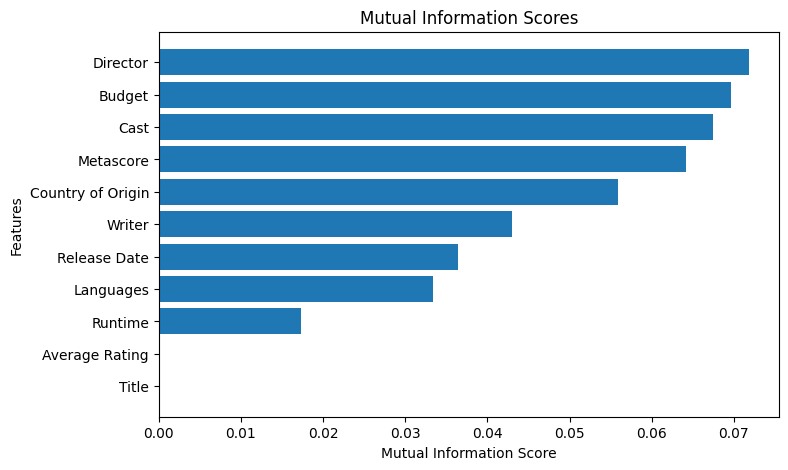

In [842]:
# Define the function to plot Mutual Information scores
import numpy as np
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)  # Sort values for horizontal bar chart
    width = np.arange(len(scores))  # Generate positions for bars
    ticks = list(scores.index)  # List of feature names for ticks
    
    # Plotting
    plt.barh(width, scores)
    plt.yticks(width, ticks)  # Set the y-axis ticks to the feature names
    plt.title("Mutual Information Scores")
    plt.xlabel("Mutual Information Score")
    plt.ylabel("Features")
    plt.show()

# Plot the MI scores
plt.figure(dpi=100, figsize=(8, 5))  # Set figure size and resolution
plot_mi_scores(mi_scores_df['MI Score'])  # Pass only MI Score column to plot function

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              4989 non-null   int64  
 1   Average Rating     4989 non-null   float64
 2   Director           4989 non-null   int64  
 3   Writer             4989 non-null   int64  
 4   Metascore          4989 non-null   float64
 5   Cast               4989 non-null   int64  
 6   Release Date       4989 non-null   int64  
 7   Country of Origin  4989 non-null   int64  
 8   Languages          4989 non-null   int64  
 9   Budget             4989 non-null   int64  
 10  Runtime            4989 non-null   int64  
 11  Worldwide Gross    4989 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 467.8 KB


In [844]:
df['Revenue_Per_Runtime'] = df['Worldwide Gross'] / df['Runtime']
df['Revenue_Per_Budget'] = df['Worldwide Gross'] / df['Budget']
df['Revenue_Per_Budget'] = df['Average Rating'] / df['Budget']
df['Revenue_Per_Rating'] = df['Average Rating'] / df['Worldwide Gross']


In [845]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Title                4989 non-null   int64  
 1   Average Rating       4989 non-null   float64
 2   Director             4989 non-null   int64  
 3   Writer               4989 non-null   int64  
 4   Metascore            4989 non-null   float64
 5   Cast                 4989 non-null   int64  
 6   Release Date         4989 non-null   int64  
 7   Country of Origin    4989 non-null   int64  
 8   Languages            4989 non-null   int64  
 9   Budget               4989 non-null   int64  
 10  Runtime              4989 non-null   int64  
 11  Worldwide Gross      4989 non-null   int64  
 12  Revenue_Per_Runtime  4989 non-null   float64
 13  Revenue_Per_Budget   4989 non-null   float64
 14  Revenue_Per_Rating   4989 non-null   float64
dtypes: float64(5), int64(10)
memory usage:

In [846]:
mi_scores = mutual_info_regression(x, y)

In [847]:
mi_scores

array([0.00000000e+00, 5.62429049e-05, 6.63688823e-02, 4.26086733e-02,
       5.87373465e-02, 6.46899629e-02, 3.58631282e-02, 4.62162366e-02,
       3.45851925e-02, 6.83768780e-02, 1.49748598e-02])

In [848]:
# Convert to DataFrame for better readability
mi_scores_df = pd.DataFrame(mi_scores, index=x.columns, columns=['MI Score'])
mi_scores_df = mi_scores_df.sort_values(by='MI Score', ascending=False)

# Print MI scores
print(mi_scores_df)

                   MI Score
Budget             0.068377
Director           0.066369
Cast               0.064690
Metascore          0.058737
Country of Origin  0.046216
Writer             0.042609
Release Date       0.035863
Languages          0.034585
Runtime            0.014975
Average Rating     0.000056
Title              0.000000
